<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#开始测试" data-toc-modified-id="开始测试-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>开始测试</a></span></li><li><span><a href="#测试方案1开始" data-toc-modified-id="测试方案1开始-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>测试方案1开始</a></span><ul class="toc-item"><li><span><a href="#方案1.1" data-toc-modified-id="方案1.1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>方案1.1</a></span></li><li><span><a href="#方案1.0" data-toc-modified-id="方案1.0-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>方案1.0</a></span></li></ul></li><li><span><a href="#方案2" data-toc-modified-id="方案2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>方案2</a></span></li><li><span><a href="#测试方案0开始" data-toc-modified-id="测试方案0开始-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>测试方案0开始</a></span><ul class="toc-item"><li><span><a href="#画trading图" data-toc-modified-id="画trading图-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>画trading图</a></span></li><li><span><a href="#方案0.3" data-toc-modified-id="方案0.3-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>方案0.3</a></span></li><li><span><a href="#方案0.1" data-toc-modified-id="方案0.1-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>方案0.1</a></span></li><li><span><a href="#方案0.2" data-toc-modified-id="方案0.2-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>方案0.2</a></span></li></ul></li><li><span><a href="#完结1" data-toc-modified-id="完结1-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>完结1</a></span></li><li><span><a href="#完结" data-toc-modified-id="完结-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>完结</a></span></li><li><span><a href="#开始测试另一个" data-toc-modified-id="开始测试另一个-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>开始测试另一个</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak

import plotly.graph_objects as go
# 创建一个 Figure 对象
# fig = go.Figure()
# # 添加竖直线
# fig.add_trace(go.Scatter(x=[2, 2], y=[0, 5], mode='lines', name='Vertical Line'))
# 显示图形
# fig.show()

# 开始测试

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
# P2405.XDCE_1min     P8888_1215 P8888_10min0430

data = pd.read_csv(r"C:/Users/JorelYin/Downloads/P8888_10min0430.csv")#('中国平安.csv')
data=data.drop('Unnamed: 0',axis=1)
data['date'] = pd.to_datetime(data['date'])
data.columns=['Date', 'Open', 'High','Low', 'Close',  'Volume', 'money', 'open_interest']
data['pcf']=data.Close.pct_change()
# # 计算MACD指标
# data['26 ema'] = data['Close'].ewm(span=26).mean()
# data['12 ema'] = data['Close'].ewm(span=12).mean()
# data['MACD'] = data['12 ema'] - data['26 ema']
# data['Signal line'] = data['MACD'].ewm(span=9).mean()

df=data[:50]
def showfig(df):
    # 计算MACD指标
    exp12 = df['Close'].ewm(span=12, adjust=False).mean()
    exp26 = df['Close'].ewm(span=26, adjust=False).mean()
    macd = exp12 - exp26
    signal = macd.ewm(span=9, adjust=False).mean()
    hist=(macd-signal)*2
    fig = make_subplots(rows=3, cols=1, shared_xaxes=True, row_heights=[0.7, 0.3,0.5], vertical_spacing=0.02)#, width=200, height=100)

    fig.add_trace(go.Candlestick(x=df['Date'], open=df['Open'],    high=df['High'],
                    low=df['Low'],  close=df['Close'],  name='K线图'), row=1, col=1)
    fig.add_trace(go.Scatter(x=[df['Date'][20], df['Date'][20]], y=[7250, 7300], mode='lines',name='xian'), row=1, col=1 )
    fig.add_trace(go.Bar(x=df['Date'], y=df['Volume'], name='成交量'), row=2, col=1)
    fig.add_trace(go.Scatter(x=df['Date'], y=macd, mode='lines', name='MACD'), row=3, col=1)
    fig.add_trace(go.Scatter(x=df['Date'], y=signal, mode='lines', name='Signal'), row=3, col=1)
    fig.add_trace(go.Bar(x=df['Date'], y=hist,  name='hist'),row=3, col=1)
   
    fig.update_layout(#title='K线图与MACD指标',
        xaxis_rangeslider_visible=False,  showlegend=False,
#         width=8000, height=800
    )

    fig.update_xaxes(type='category',row=1,col=1)
    fig.update_xaxes(type='category',row=2,col=1)
    fig.update_xaxes(type='category',row=3,col=1)
    fig.write_image('subplots2000.png', scale=1)
    fig.show()
    
# showfig(df)

df=data#[15000:23000]
def calMacd(series):
    exp12 = series.ewm(span=12, adjust=False).mean()
    exp26 = series.ewm(span=26, adjust=False).mean()
    macd = exp12 - exp26
    signal = macd.ewm(span=9, adjust=False).mean()
    hist=(macd-signal)*2
    return macd,signal,hist

macd,signal,hist=calMacd(df.Close)
import talib
# retInd: np.ndarray = talib.OBV(df.Close, df.Volume)
# retInd: np.ndarray = talib.OBV(df.Close,abs(df.Close.diff(1)))
retInd: np.ndarray = talib.OBV(hist,abs(df.Close.diff(1)))
retInd8 = talib.OBV(df.money/df.Volume, df.Volume)
subv=df.Close-retInd

In [3]:
def rs(price, period=6):
    clprcChange = price - price.shift(1)
    clprcChange = clprcChange.dropna()

    indexprc = clprcChange.index
    upPrc = pd.Series(0, index=indexprc)
    upPrc[clprcChange > 0] = clprcChange[clprcChange > 0]

    downPrc = pd.Series(0, index=indexprc)
    downPrc[clprcChange < 0] = -clprcChange[clprcChange < 0]

    SMUP = np.sum(upPrc.values, dtype=np.float32)
    SMDOWN = np.sum(downPrc.values, dtype=np.float32) 
    return 100*SMUP/(SMUP+SMDOWN) 

def get_high_low00(series:pd.Series,inteval):
    cur=0
    direction=True
    max,min=series.iloc[0],series.iloc[0]
    argmaxs=[]
    argmins=[]
    # while cur<len(df):
    #     tmp=df.Close.iloc[cur:cur+20]
    curargmax,curargmin=0,0
    tmp=series#.rolling(5).mean()
    
    peaksIndex=[]
    for i in range(len(tmp)):
        if tmp.iloc[i]>max:
            max=tmp.iloc[i]
            curargmax=i
        if tmp.iloc[i]<min:
            min=tmp.iloc[i]
            curargmin=i
        if max-min<inteval:
            continue

        if direction and tmp.iloc[i]-max<(min-max)*.2:
            argmaxs.append(curargmax)
            peaksIndex.append([curargmax,i])
            direction=not direction
            min=tmp.iloc[i]
            curargmin=i            
        if not direction and tmp.iloc[i]-min>(max-min)*.2:
            argmins.append(curargmin)
            peaksIndex.append([curargmin,i])
            direction=not direction
            max=tmp.iloc[i]
            curargmax=i 
    return peaksIndex

def purify(phi):
    def remove_consecutive(lst):
        i = 0
        while i < len(lst) - 1:
            if lst[i] + 1 == lst[i + 1]:
                del lst[i + 1]
            else:
                i += 1
        return lst

    ph=[i[0] for i in phi]
    phseries=pd.Series(ph)
    phdiff=phseries.diff().dropna()
    per20=np.percentile(phdiff,20)
    phper20=phdiff[phdiff<per20]
#     print('per20',phper20.index)
    excludelist = remove_consecutive(phper20.index.tolist())
    excludearray=np.array(excludelist)-1
    exclude = excludelist +excludearray.tolist()
#     exclude=phper20.index.append(phper20.index-1).values

    phi2=[phi[i] for i in  range( len(ph) )  if i not in exclude]
    return phi2, exclude

In [24]:
#get_high_low01 derive from get_high_low00
def get_high_low01(series:pd.Series,inteval):
    cur=0
    direction=True
    max,min=series.iloc[0],series.iloc[0]
    argmaxs=[]
    argmins=[]
    # while cur<len(df):
    #     tmp=df.Close.iloc[cur:cur+20]
    curargmax,curargmin=0,0
    tmp=series#.rolling(5).mean()
    
    peaksIndex=[]
    for i in range(len(tmp)):
        if tmp.iloc[i]>max:
            max=tmp.iloc[i]
            curargmax=i
        if tmp.iloc[i]<min:
            min=tmp.iloc[i]
            curargmin=i
        if max-min<inteval:
            continue

        if direction and tmp.iloc[i]-max<(min-max)*.2:
            argmaxs.append(curargmax)
            peaksIndex.append([curargmax,i,1])
            direction=not direction
            min=tmp.iloc[i]
            curargmin=i            
        if not direction and tmp.iloc[i]-min>(max-min)*.2:
            argmins.append(curargmin)
            peaksIndex.append([curargmin,i,0])
            direction=not direction
            max=tmp.iloc[i]
            curargmax=i 
    return peaksIndex

def get_high_low2(series:pd.Series,inteval):
    cur=0
    direction=True
    max,min=series.iloc[0],series.iloc[0]
    argmaxs=[]
    argmins=[]

    curargmax,curargmin=0,0
    tmp=series#.rolling(5).mean()
    
    peaksIndex=[]
    for i in range(len(tmp)):
        if tmp.iloc[i]>max:
            max=tmp.iloc[i]
            curargmax=i
        if tmp.iloc[i]<min:
            min=tmp.iloc[i]
            curargmin=i
        if max-min<inteval:
            continue

        if direction and tmp.iloc[i]-max<(min-max)*.2:
            argmaxs.append(curargmax)
            peaksIndex.append([curargmax,i,1])#暂时定义峰1
            direction=not direction
            min=tmp.iloc[i]
            curargmin=i            
        if not direction and tmp.iloc[i]-min>(max-min)*.2:
            argmins.append(curargmin)
            peaksIndex.append([curargmin,i,0])
            direction=not direction
            max=tmp.iloc[i]
            curargmax=i 
    
#     return peaksIndex

    ph=[i[0] for i in peaksIndex]
    phseries=pd.Series(ph)
    phdiff=phseries.diff().dropna()
    per20=np.percentile(phdiff,20)
#     phper20=phdiff[phdiff<per20]
    phper20=phdiff<per20
    
    series_p=[ tmp.iloc[i[0]] for i in peaksIndex]
    phseries=pd.Series(series_p)
    phdiff=phseries.diff().dropna()
    phdiff= np.abs(phdiff)
    per20=np.percentile(phdiff,20)
#     php=phdiff[phdiff<per20]
    php=phdiff<per20


    dfpi=pd.DataFrame(peaksIndex)
    dfpi.columns=['pi','pidiscover','dir']
    print('ls',len(dfpi),len(phper20), len(php))    
    
    dfpi['dispercent20']=phper20
    dfpi['ypercent20']=php
    
    return dfpi.values.tolist()
        

In [5]:
def purify01(phi):
    def remove_consecutive(lst):
        i = 0
        while i < len(lst) - 1:
            if lst[i] + 1 == lst[i + 1]:
                del lst[i + 1]
            else:
                i += 1
        return lst

    ph=[i[0] for i in phi]
    phseries=pd.Series(ph)
    phdiff=phseries.diff().dropna()
    per20=np.percentile(phdiff,20)
    phper20=phdiff[phdiff<per20]
#     print('per20',phper20.index)
    excludelist = remove_consecutive(phper20.index.tolist())
    excludearray=np.array(excludelist)-1
    exclude = excludelist +excludearray.tolist()
#     exclude=phper20.index.append(phper20.index-1).values

    phi2=[phi[i] for i in  range( len(ph) )  if i not in excludelist]
    return phi2

# 测试方案1开始

In [31]:
phib

[[5, 6, 1],
 [9, 10, 1],
 [13, 16, 0],
 [28, 32, 1],
 [34, 38, 0],
 [48, 55, 1],
 [57, 60, 0],
 [61, 64, 1],
 [65, 66, 0],
 [76, 77, 0],
 [83, 86, 1],
 [93, 96, 0],
 [96, 97, 1],
 [100, 102, 1],
 [108, 110, 1],
 [116, 119, 0],
 [124, 127, 1],
 [127, 129, 0],
 [134, 136, 1],
 [140, 142, 1],
 [149, 153, 0],
 [154, 156, 1],
 [161, 164, 0],
 [169, 171, 1],
 [185, 190, 0],
 [190, 191, 1],
 [198, 201, 0],
 [206, 208, 1],
 [209, 210, 0],
 [214, 217, 0],
 [248, 252, 1],
 [270, 279, 0],
 [280, 282, 1],
 [289, 292, 0],
 [292, 294, 1],
 [299, 301, 0],
 [302, 304, 1],
 [306, 308, 0],
 [310, 312, 1],
 [322, 325, 0],
 [326, 327, 1],
 [329, 330, 0],
 [333, 335, 1],
 [339, 342, 0],
 [352, 355, 1],
 [356, 359, 0],
 [361, 363, 1],
 [375, 380, 0],
 [381, 382, 1],
 [385, 386, 0],
 [387, 388, 0],
 [394, 396, 1],
 [400, 403, 0],
 [404, 406, 1],
 [412, 413, 1],
 [418, 423, 1],
 [426, 430, 0],
 [433, 434, 1],
 [436, 440, 0],
 [440, 441, 1],
 [453, 457, 0],
 [457, 459, 1],
 [464, 466, 0],
 [481, 487, 1],
 [503

In [34]:
starti=0
endi=len(df)#  1000#    15000  #
series=hist[starti:endi]
phia=get_high_low01(series,1.8)
phib=purify01(phia)

def getLastreserv(phib,start):
    dir=phib[start][2]
    for i in range(1,10):
        if start>=i and phib[start-i][2]!=dir:
            return start-i
    return None

ph=[i[0] for i in phib]
scorelist=[0,]
closeseries=df.Close[starti:endi]
for i in range(2,len(ph)):
    sc=closeseries[phib[getLastreserv(phib,i)][0]: ph[i]+1]
    score=int(rs(sc)   )#     score=rs(sc)
#     print('i',i,ph[i],score)
    scorelist.append(score)    

if False:
    fig,ax=plt.subplots(figsize=(60,6))
    series[:].plot()
    miny=np.min(series)
    maxy=np.max(series)

    mincloseseries=np.min(closeseries)
    scoreSums=[]
    xx=[]
    for i,line_x in enumerate(ph[:]):
        if i<2: continue
        scoreSum=scorelist[getLastreserv(phib,i)]+scorelist[i]   
        x=line_x+series.index[0]  
        xx.append(x)
        if phib[i][2]==1:
            plt.axvline(x=x, color='r', linestyle='--')
            plt.annotate(str(i),xy=(x,miny), xytext=(x-1,miny))# 
            plt.annotate(str(scorelist[i]),xy=(x,maxy), xytext=(x-1,maxy))#   

            plt.annotate(str(scoreSum),xy=(x,miny), xytext=(x-1,miny+2))# 
        else:
            plt.axvline(x=x, color='b', linestyle='--')
            plt.annotate(str(scorelist[i]),xy=(x,maxy), xytext=(x-1,maxy-2))#  
            plt.annotate(str(scoreSum),xy=(x,miny), xytext=(x-1,miny+1))# 
        scoreSums.append(scoreSum + mincloseseries)
    plt.axhline(0, color='r', linestyle='-')

    ax2=ax.twinx()
    closeseries.plot(color='r')
    ax2.plot(xx,scoreSums,color='black')

## 方案1.0

In [35]:
ret=[]
position=0 
for i,line_x in enumerate(ph):
    if i==0: continue
    x=line_x+series.index[0]    
    if phib[i][2]==1:
        if position==1 and scorelist[i]<85:
            closelongprice=closeseries.iloc[phib[i][1]]
            rettmp=round(closelongprice/openlongprice-1,4)
            ret.append((rettmp,i))
            position=0      
            print(i,'long close ',closelongprice,rettmp ,'\n')
        if position==0 and scorelist[i]<65:
            openshortprice=closeseries.iloc[phib[i][1]]
            position=-1
            print(i, 'short open  ',openshortprice)
    
    else:
        if position==-1 and scorelist[i]>30:
            closeshortprice=closeseries.iloc[phib[i][1]]
            rettmp=round(1-closeshortprice/openshortprice,4)
            ret.append((rettmp,i))
            position=0
            print(i,'short close  ',closeshortprice,rettmp ,'\n')
        if position==0 and scorelist[i]>40:
            openlongprice=closeseries.iloc[phib[i][1]]
            position=1
            print(i,'long open  ',openlongprice)
# print(,sep='\n')
retbene=[i[0] for i in ret]
ret,np.sum(retbene),len(ret)

1 short open   8578.289
2 short close   8549.565 0.0033 

2 long open   8549.565
3 long close  8391.403 -0.0185 

3 short open   8391.403
4 short close   8423.657 -0.0038 

4 long open   8423.657
5 long close  8353.846 -0.0083 

5 short open   8353.846
6 short close   8412.844 -0.0071 

6 long open   8412.844
7 long close  8368.968 -0.0052 

7 short open   8368.968
9 short close   8273.041 0.0115 

9 long open   8273.041
10 long close  8253.811 -0.0023 

10 short open   8253.811
11 short close   8195.727 0.007 

11 long open   8195.727
12 long close  8171.33 -0.003 

12 short open   8171.33
15 short close   8027.075 0.0177 

15 long open   8027.075
16 long close  7997.938 -0.0036 

16 short open   7997.938
17 short close   8009.655 -0.0015 

17 long open   8009.655
18 long close  7982.133 -0.0034 

19 short open   8072.506
20 short close   8154.999 -0.0102 

20 long open   8154.999
21 long close  8151.596 -0.0004 

21 short open   8151.596
22 short close   8192.842 -0.0051 

22 long op

IndexError: list index out of range

## 方案1.1

In [21]:
ret=[]
position=0 
for i,line_x in enumerate(ph):
    if i==0: continue
    x=line_x+series.index[0]    
    scoreSum=scorelist[getLastreserv(phib,i)]+scorelist[i]    
    if phib[i][2]==1:

        if position==1 and scorelist[i]<85:
            closelongprice=closeseries.iloc[phib[i][1]]
            rettmp=round(closelongprice/openlongprice-1,4)
            ret.append((rettmp,i))
            position=0      
            print(i,'long close ',closelongprice,rettmp ,'\n')
        if position==0 and scorelist[i]<65:
            openshortprice=closeseries.iloc[phib[i][1]]
            position=-1
            print(i, 'short open  ',openshortprice)
    
    else:
        if position==-1 and scorelist[i]>30:
            closeshortprice=closeseries.iloc[phib[i][1]]
            rettmp=round(1-closeshortprice/openshortprice,4)
            ret.append((rettmp,i))
            position=0
            print(i,'short close  ',closeshortprice,rettmp ,'\n')
        if position==0 and scorelist[i]>40:
            openlongprice=closeseries.iloc[phib[i][1]]
            position=1
            print(i,'long open  ',openlongprice)
# print(,sep='\n')
retbene=[i[0] for i in ret]
ret,np.sum(retbene),len(ret)

2 short open   7419.705
13 short close   7421.388 -0.0002 

13 long open   7421.388
14 long close  7424.494 0.0004 

14 short open   7424.494
15 short close   7427.37 -0.0004 

18 short open   7338.392
19 short close   7325.595 0.0017 

19 long open   7325.595
20 long close  7316.321 -0.0013 

20 short open   7316.321
32 short close   7270.357 0.0063 

38 long open   7301.276
41 long close  7364.649 0.0087 

46 short open   7339.251
49 short close   7365.957 -0.0036 

49 long open   7365.957
57 long close  7415.394 0.0067 

63 short open   7421.158
79 short close   7395.528 0.0035 

82 short open   7406.635


([(-0.0002, 13),
  (0.0004, 14),
  (-0.0004, 15),
  (0.0017, 19),
  (-0.0013, 20),
  (0.0063, 32),
  (0.0087, 41),
  (-0.0036, 49),
  (0.0067, 57),
  (0.0035, 79)],
 0.0218,
 10)

# 方案2

In [29]:
starti=0
endi=1000  #len(df)#
series=hist[starti:endi]
phi0=get_high_low2(series,1.8)
phi0

ls 118 117 117


[[5, 6, 1, nan, nan],
 [6, 8, 0, True, True],
 [9, 10, 1, True, True],
 [13, 16, 0, False, False],
 [28, 32, 1, False, False],
 [34, 38, 0, False, False],
 [48, 55, 1, False, False],
 [57, 60, 0, False, False],
 [61, 64, 1, False, False],
 [65, 66, 0, False, True],
 [66, 67, 1, True, True],
 [76, 77, 0, False, False],
 [83, 86, 1, False, False],
 [93, 96, 0, False, False],
 [96, 97, 1, True, True],
 [97, 100, 0, True, True],
 [100, 102, 1, True, True],
 [102, 104, 0, True, True],
 [108, 110, 1, False, False],
 [116, 119, 0, False, False],
 [124, 127, 1, False, False],
 [127, 129, 0, True, False],
 [134, 136, 1, False, False],
 [136, 137, 0, True, True],
 [140, 142, 1, False, False],
 [149, 153, 0, False, False],
 [154, 156, 1, False, False],
 [161, 164, 0, False, False],
 [169, 171, 1, False, False],
 [185, 190, 0, False, False],
 [190, 191, 1, False, False],
 [198, 201, 0, False, False],
 [206, 208, 1, False, False],
 [209, 210, 0, True, False],
 [210, 211, 1, True, True],
 [214, 217,

In [ ]:
starti=0
endi=1000  #len(df)#
series=hist[starti:endi]
phi0=get_high_low2(series,1.8)
# phi,excludelist=purify(phi0)
phi =phi0
ph=[i[0] for i in phi]

scorelist=[-1000,]
closeseries=df.Close[starti:endi]
for i in range(1,len(ph)):
    sc=closeseries[ph[i-1]: ph[i]+1]
    score=int(rs(sc)   )#     score=rs(sc)
#     print('i',i,ph[i],score)
    scorelist.append(score)      


ret=[]
position=0 
traderecord=[]

for i,line_x in enumerate(ph):
    if i==0: continue
#     x=line_x+series.index[0]    
    if i%2==0:
        if position==1 and scorelist[i]<85:
            closelongprice=closeseries.iloc[phi[i][1]]
            rettmp=round(closelongprice/openlongprice-1,4)
            ret.append((rettmp,i))
            position=0     
            traderecord.append([2,i,closelongprice])
            print(i,'long close ',closelongprice,rettmp ,'\n')
        if position==0 and scorelist[i]<65:
            openshortprice=closeseries.iloc[phi[i][1]]
            position=-1
            traderecord.append([3,i,openshortprice])
            print(i, 'short open  ',openshortprice)
    
    if i%2==1:
        if position==-1 and scorelist[i]>30:
            closeshortprice=closeseries.iloc[phi[i][1]]
            rettmp=round(1-closeshortprice/openshortprice,4)
            ret.append((rettmp,i))
            position=0
            traderecord.append([4,i,closeshortprice])
            print(i,'short close  ',closeshortprice,rettmp ,'\n')
        if position==0 and scorelist[i]>40:
            openlongprice=closeseries.iloc[phi[i][1]]
            position=1
            traderecord.append([1,i,openlongprice])
            print(i,'long open  ',openlongprice)
# print(,sep='\n')
retbene=[i[0] for i in ret]
ret,np.sum(retbene),len(ret)

# 测试方案0开始

In [9]:
starti=0
endi=1000  #len(df)#
series=hist[starti:endi]
phi0=get_high_low00(series,3)
phi,excludelist=purify(phi0)
phi =phi0
ph=[i[0] for i in phi]

scorelist=[-1000,]
closeseries=df.Close[starti:endi]
for i in range(1,len(ph)):
    sc=closeseries[ph[i-1]: ph[i]+1]
    score=int(rs(sc)   )#     score=rs(sc)
#     print('i',i,ph[i],score)
    scorelist.append(score)      


ret=[]
position=0 
traderecord=[]

for i,line_x in enumerate(ph):
    if i==0: continue
#     x=line_x+series.index[0]    
    if i%2==0:
        if position==1 and scorelist[i]<85:
            closelongprice=closeseries.iloc[phi[i][1]]
            rettmp=round(closelongprice/openlongprice-1,4)
            ret.append((rettmp,i))
            position=0     
            traderecord.append([2,i,closelongprice])
            print(i,'long close ',closelongprice,rettmp ,'\n')
        if position==0 and scorelist[i]<65:
            openshortprice=closeseries.iloc[phi[i][1]]
            position=-1
            traderecord.append([3,i,openshortprice])
            print(i, 'short open  ',openshortprice)
    
    if i%2==1:
        if position==-1 and scorelist[i]>30:
            closeshortprice=closeseries.iloc[phi[i][1]]
            rettmp=round(1-closeshortprice/openshortprice,4)
            ret.append((rettmp,i))
            position=0
            traderecord.append([4,i,closeshortprice])
            print(i,'short close  ',closeshortprice,rettmp ,'\n')
        if position==0 and scorelist[i]>40:
            openlongprice=closeseries.iloc[phi[i][1]]
            position=1
            traderecord.append([1,i,openlongprice])
            print(i,'long open  ',openlongprice)
# print(,sep='\n')
retbene=[i[0] for i in ret]
ret,np.sum(retbene),len(ret)

14 short open   8171.33
23 short close   8154.999 0.002 

23 long open   8154.999
30 long close  8205.926 0.0062 

34 short open   8203.014
35 short close   8374.532 -0.0209 

35 long open   8374.532
40 long close  8385.75 0.0013 

49 long open   8594.092
56 long close  8593.233 -0.0001 

71 long open   8673.68
72 long close  8614.313 -0.0068 

86 short open   8933.167
89 short close   8833.501 0.0112 

92 short open   9007.781
93 short close   8963.45 0.0049 

102 short open   8954.611
109 short close   9224.156 -0.0301 

109 long open   9224.156
110 long close  9437.028 0.0231 



([(0.002, 23),
  (0.0062, 30),
  (-0.0209, 35),
  (0.0013, 40),
  (-0.0001, 56),
  (-0.0068, 72),
  (0.0112, 89),
  (0.0049, 93),
  (-0.0301, 109),
  (0.0231, 110)],
 -0.009199999999999996,
 10)

## 画trading图

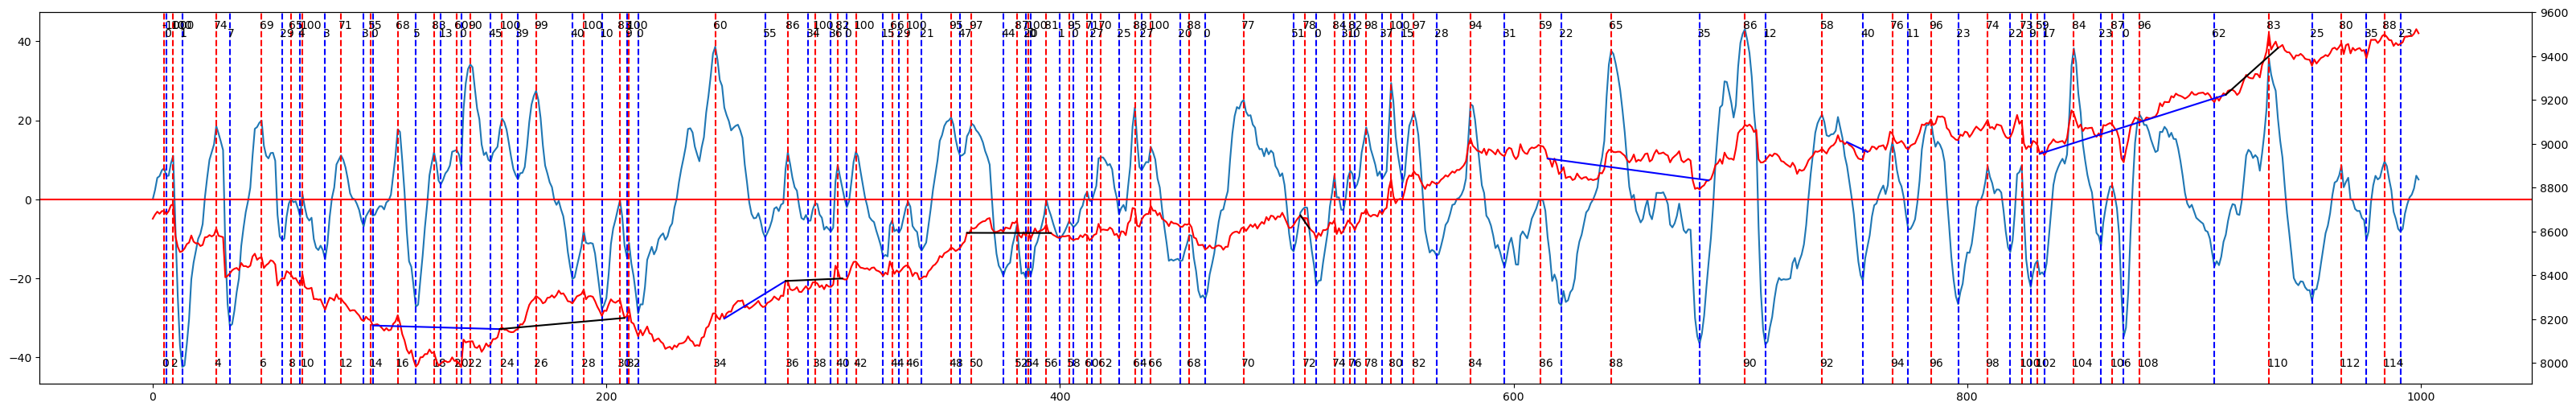

In [7]:
fig,ax=plt.subplots(figsize=(40,6))
series[:].plot()
miny=np.min(series)
maxy=np.max(series)

for i,line_x in enumerate(ph[:]):
    x=line_x+series.index[0]  
    if i%2==0:
        plt.axvline(x=x, color='r', linestyle='--')
        plt.annotate(str(i),xy=(x,miny), xytext=(x-1,miny))# 
        plt.annotate(str(scorelist[i]),xy=(x,maxy), xytext=(x-1,maxy))#   
    else:
        plt.axvline(x=x, color='b', linestyle='--')
        plt.annotate(str(scorelist[i]),xy=(x,maxy), xytext=(x-1,maxy-2))#    
plt.axhline(0, color='r', linestyle='-')

ax2=ax.twinx()
df.Close[starti:endi].plot(color='r')
for i in range(len(traderecord)-1):
    if traderecord[i][0]==1:
        x=phi[traderecord[i][1]][1]+series.index[0]  
        x1=phi[traderecord[i+1][1]][1]+series.index[0]  
        y=df.Close[x]
        y1=df.Close[x1]        
        plt.plot([x,x1],[y,y1],color='black')
#         print('huaxian--',i)
    if traderecord[i][0]==3:
        x=phi[traderecord[i][1]][1] +series.index[0]  
        x1=phi[traderecord[i+1][1]][1] +series.index[0]  
        y=df.Close[x]
        y1=df.Close[x1]        
        plt.plot([x,x1],[y,y1],color='blue')
#         print('huaxian--',i)

## 方案0.3

In [128]:
starti=0
endi=len(df)#4000  #
series=hist[starti:endi]
phi0=get_high_low00(series,3)
phi,excludelist=purify(phi0)
phi =phi0
ph=[i[0] for i in phi]

scorelist=[-1000,]
closeseries=df.Close[starti:endi]
for i in range(1,len(ph)):
    sc=closeseries[ph[i-1]: ph[i]+1]
    score=int(rs(sc)   )#     score=rs(sc)
#     print('i',i,ph[i],score)
    scorelist.append(score)      


ret=[]
position=0 
traderecord=[]

for i,line_x in enumerate(ph):
    if i==0: continue
#     x=line_x+series.index[0]    
    if i%2==0:
        if position==1 and scorelist[i]<85:
            closelongprice=closeseries.iloc[phi[i][1]]
            rettmp=round(closelongprice/openlongprice-1,4)
            ret.append((rettmp,i))
            position=0     
            traderecord.append([2,i,closelongprice])
            print(i,'long close ',closelongprice,rettmp ,'\n')
        if position==0 and scorelist[i]<65:
            openshortprice=closeseries.iloc[phi[i][1]]
            position=-1
            traderecord.append([3,i,openshortprice])
            print(i, 'short open  ',openshortprice)
#             for k in range(phi[i][1],phi[i+2][1]):
#                 currentprice=closeseries.iloc[k]
#                 if currentprice>openshortprice+40:
#                     closeshortprice=currentprice
#                     rettmp=round(1-closeshortprice/openshortprice,4)
# #                     ret.append((rettmp,k/10))
#                     position=0
# #                     traderecord.append([4,k/10,closeshortprice])
#                     print(i,'short close  ',closeshortprice,rettmp ,'\n')
#                     break
#             if position==-1:
#                 openshortprice=closeseries.iloc[phi[i+2][1]]
    
    if i%2==1:
        if position==-1 and scorelist[i]>30:
            closeshortprice=closeseries.iloc[phi[i][1]]
            rettmp=round(1-closeshortprice/openshortprice,4)
            ret.append((rettmp,i))
            position=0
            traderecord.append([4,i,closeshortprice])
            print(i,'short close  ',closeshortprice,rettmp ,'\n')
        if position==0 and scorelist[i]>40:
            openlongprice=closeseries.iloc[phi[i][1]]
            position=1
            traderecord.append([1,i,openlongprice])
            print(i,'long open  ',openlongprice)
#             for k in range(phi[i][1],phi[i+2][1]):
#                 currentprice=closeseries.iloc[k]
#                 if currentprice<openlongprice-40:
#                     closelongprice=currentprice
#                     rettmp=round(closelongprice/openlongprice-1,4)
# #                     ret.append((rettmp,k/10))
#                     position=0     
# #                     traderecord.append([2,k/10,closelongprice])
#                     print(i,'long close k_10 ',closelongprice,rettmp ,'\n')
#                     break
#             if position==1:
#                 openlongprice=closeseries.iloc[phi[i+2][1]]
# print(,sep='\n')
retbene=[i[0] for i in ret]
ret,np.sum(retbene),len(ret)

14 short open   8171.33
23 short close   8154.999 0.002 

23 long open   8154.999
30 long close  8205.926 0.0062 

34 short open   8203.014
35 short close   8374.532 -0.0209 

35 long open   8374.532
40 long close  8385.75 0.0013 

49 long open   8594.092
56 long close  8593.233 -0.0001 

71 long open   8673.68
72 long close  8614.313 -0.0068 

86 short open   8933.167
89 short close   8833.501 0.0112 

92 short open   9007.781
93 short close   8963.45 0.0049 

102 short open   8954.611
109 short close   9224.156 -0.0301 

109 long open   9224.156
110 long close  9437.028 0.0231 

131 long open   9580.754
136 long close  9916.474 0.035 

144 short open   10104.759
153 short close   9994.264 0.0109 

153 long open   9994.264
156 long close  9903.823 -0.009 

156 short open   9903.823
161 short close   10105.692 -0.0204 

161 long open   10105.692
168 long close  9984.512 -0.012 

175 long open   10119.796
178 long close  10126.137 0.0006 

185 long open   10325.906
194 long close  11470

([(0.002, 23),
  (0.0062, 30),
  (-0.0209, 35),
  (0.0013, 40),
  (-0.0001, 56),
  (-0.0068, 72),
  (0.0112, 89),
  (0.0049, 93),
  (-0.0301, 109),
  (0.0231, 110),
  (0.035, 136),
  (0.0109, 153),
  (-0.009, 156),
  (-0.0204, 161),
  (-0.012, 168),
  (0.0006, 178),
  (0.1108, 194),
  (-0.0024, 203),
  (-0.0069, 204),
  (0.0157, 212),
  (0.0128, 223),
  (0.0593, 247),
  (-0.0337, 255),
  (-0.0039, 262),
  (-0.0152, 268),
  (0.008, 285),
  (-0.0128, 288),
  (-0.0107, 294),
  (-0.0417, 307),
  (0.0001, 308),
  (0.009, 320),
  (-0.0034, 338),
  (0.0069, 344),
  (0.0045, 357),
  (0.0074, 361),
  (0.0292, 379),
  (-0.0049, 380),
  (-0.0201, 401),
  (-0.0089, 402),
  (0.0051, 407),
  (0.0215, 424),
  (0.056, 447),
  (-0.0176, 450),
  (0.1283, 483),
  (-0.0144, 484),
  (0.1742, 509),
  (-0.0063, 514),
  (-0.0586, 537),
  (-0.0129, 542),
  (-0.0131, 563),
  (-0.0108, 566),
  (-0.0194, 571),
  (0.049, 574),
  (-0.0387, 582),
  (0.0411, 603),
  (0.0001, 608),
  (0.0037, 616),
  (0.0116, 631),
  

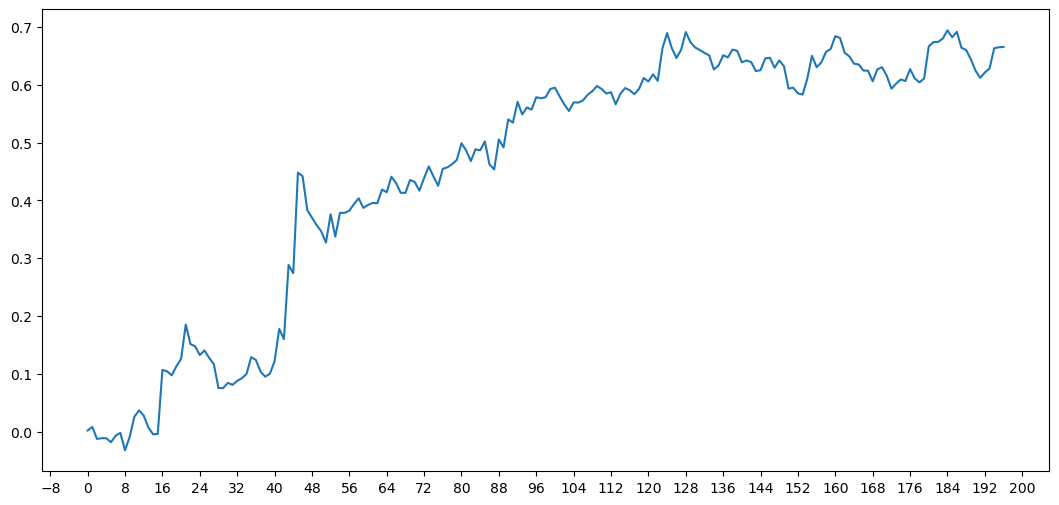

In [129]:
from matplotlib import ticker
cumsum=np.cumsum(retbene)
cumsum=pd.Series(cumsum)
fig,ax=plt.subplots(figsize=(13,6))
cumsum.plot()
ax.xaxis.set_major_locator(ticker.MaxNLocator(30))

In [127]:
dd=(cumsum-np.maximum.accumulate(cumsum))/np.maximum.accumulate(cumsum)
mdd=np.min(dd)
endidx=np.argmin(dd)
mdd,endidx

(-2.1082802547770707, 14)

In [108]:
cumsum[5:32]

5    -0.0183
6    -0.0071
7    -0.0022
8    -0.0323
9    -0.0092
10    0.0258
11    0.0367
12    0.0277
13    0.0073
14   -0.0047
15   -0.0041
16    0.1067
17    0.1043
18    0.0974
19    0.1131
20    0.1259
21    0.1852
22    0.1515
23    0.1476
24    0.1324
25    0.1404
26    0.1276
27    0.1169
28    0.0752
29    0.0753
30    0.0843
31    0.0809
dtype: float64

In [109]:
np.maximum.accumulate(cumsum)[5:32]

5     0.0082
6     0.0082
7     0.0082
8     0.0082
9     0.0082
10    0.0258
11    0.0367
12    0.0367
13    0.0367
14    0.0367
15    0.0367
16    0.1067
17    0.1067
18    0.1067
19    0.1131
20    0.1259
21    0.1852
22    0.1852
23    0.1852
24    0.1852
25    0.1852
26    0.1852
27    0.1852
28    0.1852
29    0.1852
30    0.1852
31    0.1852
dtype: float64

## 方案0.1

<AxesSubplot:>

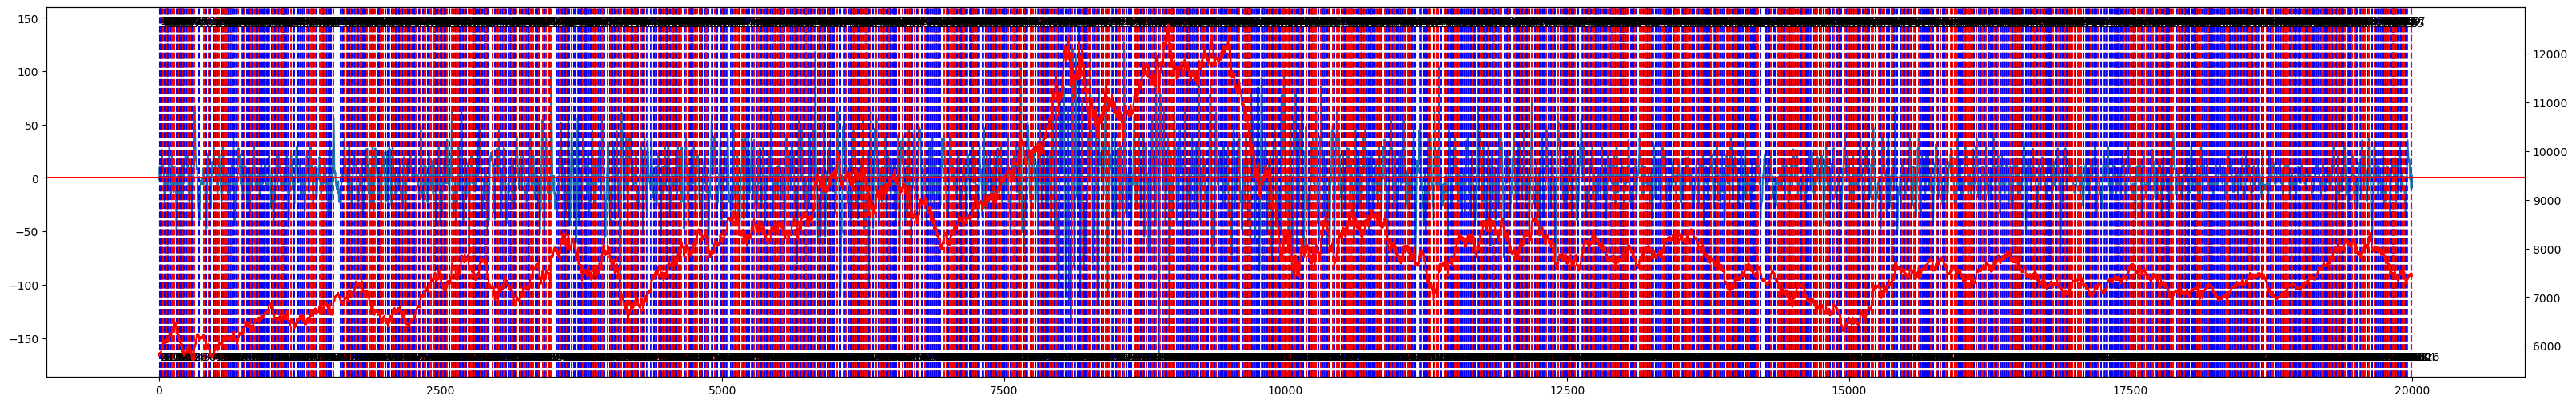

In [64]:
starti=0
endi=len(df)#   1000  #=3000#
series=hist.iloc[starti:endi]
closeseries=df.Close.iloc[starti:endi]

phi0=get_high_low00(series,1.8)
phif,excludelist=purify(phi0)
phi =phi0
phf=[i[0] for i in phif]

scorelistf={phf[0]:-1000}
for i in range(1,len(phf)):
    sc=closeseries.iloc[phf[i-1]: phf[i]+1]
    score=int(rs(sc)   ) 
    scorelistf[phf[i]]=score

ph=[i[0] for i in phi]

scorelist={ph[0]:-1000}
for i in range(1,len(ph)):
    sc=closeseries.iloc[ph[i-1]: ph[i]+1]
    score=int(rs(sc)   )
    # scorelist.append(score)   
    scorelist[ph[i]]=score
    
fig,ax=plt.subplots(figsize=(40,6))
series[:].plot()
miny=np.min(series)
maxy=np.max(series)

for i,line_x in enumerate(ph[:]):
    x=line_x+series.index[0]  
    if i%2==0:
        plt.axvline(x=x, color='r', linestyle='--')
        plt.annotate(str(i),xy=(x,miny), xytext=(x-1,miny))# 
        plt.annotate(str(scorelist[ph[i]]),xy=(x,maxy), xytext=(x-1,maxy))#   
    else:
        plt.axvline(x=x, color='b', linestyle='--')
        plt.annotate(str(scorelist[ph[i]]),xy=(x,maxy), xytext=(x-1,maxy-2))#    
plt.axhline(0, color='r', linestyle='-')

ax2=ax.twinx()
df.Close.iloc[starti:endi].plot(color='r')

In [65]:
ret=[]
position=0 
traderecord=[]

ret2=[]
position2=0
for i in range(1,len(ph)):
    if i==0: continue
    if len(traderecord)>0 and traderecord[-1][1]==i-1 and i-1 in excludelist and i in excludelist:  
        if traderecord[-1][0]==1:
            closelongprice2=closeseries.iloc[phi[i][1]]
            rettmp2=round(closelongprice2/openlongprice-1,4)
            ret2.append((rettmp2,i))
            # position=0      
            print(i,'long2 close ',closelongprice2,rettmp2 ,'\n')    
        elif traderecord[-1][0]==2:
            openlongprice2=closeseries.iloc[phi[i][1]]
            position2=1
            print(i,'long2 open  ',openlongprice2)
            
        elif traderecord[-1][0]==3:
            closeshortprice2=closeseries.iloc[phi[i][1]]
            rettmp2=round(1-closeshortprice2/openshortprice,4)
            ret2.append((rettmp2,i))
            # position=0
            print(i,'short2 close  ',closeshortprice2,rettmp2 ,'\n')
            # traderecord.append([4,i])
        elif traderecord[-1][0]==4:
            openshortprice2=closeseries.iloc[phi[i][1]]
            position2=-1
            print(i, 'short2 open  ',openshortprice2)
            
###----------------------------------------------------------------------------------
    if i%2==0:
        if position2==1:
            if i not in excludelist and scorelistf[ph[i]]<85:
                closelongprice2=closeseries.iloc[phi[i][1]]
                rettmp2=round(closelongprice2/openlongprice2-1,4)
                ret2.append((rettmp2,i))
                position2=0      
                print(i,'long2 close2 ',closelongprice2,rettmp2 ,'\n')
                traderecord.append([2,i])
                
            if i in excludelist and scorelist[ph[i]]<85:
                closelongprice2=closeseries.iloc[phi[i][1]]
                rettmp2=round(closelongprice2/openlongprice2-1,4)
                ret2.append((rettmp2,i))
                position2=0      
                print(i,'long2 close2 ',closelongprice2,rettmp2 ,'\n')
                traderecord.append([2,i])
                
                if i in excludelist or i+1 in excludelist:
                    print('attentions: ' ,i)
    if i%2==1:

        if position2==-1:
            if i not in excludelist and scorelistf[ph[i]]>30:
                closeshortprice2=closeseries.iloc[phi[i][1]]
                rettmp2=round(1-closeshortprice2/openshortprice2,4)
                ret2.append((rettmp2,i))
                position2=0
                print(i,'short2 close2  ',closeshortprice2,rettmp2 ,'\n')
                traderecord.append([4,i])
                # if i in excludelist or i+1 in excludelist:
                #     print('attentions: ' ,i)
            if i in excludelist  and scorelist[ph[i]]>30:
                closeshortprice2=closeseries.iloc[phi[i][1]]
                rettmp2=round(1-closeshortprice2/openshortprice2,4)
                ret2.append((rettmp2,i))
                position2=0
                print(i,'short2 close2  ',closeshortprice2,rettmp2 ,'\n')
                traderecord.append([4,i])
                if i in excludelist or i+1 in excludelist:
                    print('attentions: ' ,i)            
    #####------------------------------------------------------------------------------------
    if i%2==0:
        if position==1 and scorelist[ph[i]]<85:
            closelongprice=closeseries.iloc[phi[i][1]]
            rettmp=round(closelongprice/openlongprice-1,4)
            ret.append((rettmp,i))
            position=0      
            print(i,'long close ',closelongprice,rettmp ,'\n')
            traderecord.append([2,i])
        if position==0 and scorelist[ph[i]]<65:
            openshortprice=closeseries.iloc[phi[i][1]]
            position=-1
            print(i, 'short open  ',openshortprice)
            traderecord.append([3,i])
    
    if i%2==1:
        if position==-1 and scorelist[ph[i]]>30:
            closeshortprice=closeseries.iloc[phi[i][1]]
            rettmp=round(1-closeshortprice/openshortprice,4)
            ret.append((rettmp,i))
            position=0
            print(i,'short close  ',closeshortprice,rettmp ,'\n')
            traderecord.append([4,i])
        if position==0 and scorelist[ph[i]]>40:
            openlongprice=closeseries.iloc[phi[i][1]]
            position=1
            print(i,'long open  ',openlongprice)
            traderecord.append([1,i])

#########################################

if len(traderecord)>0 and traderecord[-1][1]==i and i-1 in excludelist and i in excludelist:  
        if traderecord[-1][0]==1:
            closelongprice2=closeseries.iloc[phi[i][1]]
            rettmp2=round(closelongprice2/openlongprice-1,4)
            ret2.append((rettmp2,i))
            # position=0      
            print(i,'long2 close3 ',closelongprice2,rettmp2 ,'\n')    
        elif traderecord[-1][0]==2:
            openlongprice2=closeseries.iloc[phi[i][1]]
            position2=1
            print(i,'long2 open3  ',openlongprice2)
            
        elif traderecord[-1][0]==3:
            closeshortprice2=closeseries.iloc[phi[i][1]]
            rettmp2=round(1-closeshortprice2/openshortprice,4)
            ret2.append((rettmp2,i))
            print(i,'short2 close3  ',closeshortprice2,rettmp2 ,'\n')
            # traderecord.append([4,i])
        elif traderecord[-1][0]==4:
            openshortprice2=closeseries.iloc[phi[i][1]]
            position2=-1
            print(i, 'short2 open3  ',openshortprice2)
            
# print(,sep='\n')
retbene=[i[0] for i in ret]
ret,np.sum(retbene),len(ret)

1 long open   5867.077
2 long2 close  5854.901 -0.0021 

8 long close  6063.504 0.0335 

15 long open   6304.69
20 long close  6170.116 -0.0213 

20 short open   6170.116
31 short close   5950.175 0.0356 

31 long open   5950.175
34 long close  5786.611 -0.0275 

37 long open   6172.875
38 long close  6163.991 -0.0014 

38 short open   6163.991
43 short close   5916.148 0.0402 

45 long open   5981.338
48 long close  6064.136 0.0138 

50 short open   5962.506
51 short2 close   6006.395 -0.0074 

53 short close   6174.754 -0.0356 

74 short open   6036.181
77 short close   6334.121 -0.0494 

77 long open   6334.121
84 long close  6418.402 0.0133 

84 short open   6418.402
85 short2 close   6466.711 -0.0075 

89 short close   6400.612 0.0028 

105 long open   6692.476
108 long close  6688.205 -0.0006 

114 short open   6571.746
119 short close   6626.598 -0.0083 

135 long open   6730.012
136 long2 close  6699.239 -0.0046 

138 long close  6505.15 -0.0334 

138 short open   6505.15
139 s

([(0.0335, 8),
  (-0.0213, 20),
  (0.0356, 31),
  (-0.0275, 34),
  (-0.0014, 38),
  (0.0402, 43),
  (0.0138, 48),
  (-0.0356, 53),
  (-0.0494, 77),
  (0.0133, 84),
  (0.0028, 89),
  (-0.0006, 108),
  (-0.0083, 119),
  (-0.0334, 138),
  (0.0011, 139),
  (-0.0005, 144),
  (-0.0024, 156),
  (-0.0279, 170),
  (-0.0095, 178),
  (-0.0261, 181),
  (-0.0018, 182),
  (-0.0129, 194),
  (0.1026, 223),
  (0.0257, 230),
  (0.0074, 251),
  (0.0007, 254),
  (0.0028, 258),
  (-0.0028, 260),
  (-0.0248, 293),
  (-0.0233, 301),
  (0.0375, 321),
  (-0.0146, 326),
  (0.0363, 347),
  (-0.0313, 350),
  (0.0272, 365),
  (0.0077, 366),
  (-0.0129, 372),
  (0.0213, 386),
  (0.0118, 395),
  (-0.0108, 400),
  (-0.0347, 403),
  (-0.0193, 412),
  (0.0005, 419),
  (0.0234, 429),
  (-0.0043, 434),
  (-0.0174, 445),
  (-0.0011, 452),
  (0.1527, 471),
  (0.0033, 472),
  (-0.045, 489),
  (0.0416, 496),
  (-0.0372, 511),
  (-0.0042, 546),
  (-0.0553, 560),
  (-0.0327, 563),
  (-0.0068, 564),
  (0.0189, 578),
  (0.0022, 

In [66]:
retbene=[i[0] for i in ret2]
ret2,np.sum(retbene),len(ret2)

([(-0.0021, 2),
  (-0.0074, 51),
  (-0.0075, 85),
  (-0.0046, 136),
  (-0.0067, 168),
  (-0.0064, 195),
  (0.0037, 256),
  (-0.0104, 299),
  (-0.0144, 414),
  (-0.0075, 430),
  (0.005, 450),
  (-0.0078, 554),
  (-0.0094, 620),
  (-0.0044, 650),
  (-0.0035, 685),
  (-0.0065, 700),
  (-0.0016, 759),
  (-0.0046, 810),
  (0.0048, 834),
  (-0.0236, 914),
  (-0.0044, 939),
  (-0.0022, 1023),
  (-0.0071, 1107),
  (-0.0021, 1144),
  (-0.0096, 1151),
  (-0.0081, 1164),
  (-0.004, 1212),
  (-0.0056, 1310),
  (-0.0048, 1363),
  (-0.004, 1381),
  (-0.0041, 1478),
  (0.0013, 1494),
  (0.0025, 1502),
  (-0.0023, 1595),
  (-0.0025, 1614),
  (-0.0034, 1637),
  (0.0222, 1643),
  (-0.0011, 1691),
  (-0.0024, 1893),
  (0.0095, 1916),
  (0.0013, 1920),
  (-0.0015, 2000),
  (-0.0023, 2043),
  (-0.0018, 2066),
  (0.0002, 2080),
  (-0.0053, 2082),
  (-0.0041, 2130),
  (-0.0025, 2172),
  (-0.0015, 2196),
  (0.0102, 2242),
  (-0.0026, 2245)],
 -0.15699999999999997,
 51)

## 方案0.2

In [51]:
ret=[]
position=0 
traderecord=[]

ret2=ret#[]
position2=0
for i in range(1,len(ph)):
    if i==0: continue
    if len(traderecord)>0 and traderecord[-1][1]==i-1 and i-1 in excludelist and i in excludelist:  
        if traderecord[-1][0]==1:
            closelongprice=closeseries.iloc[phi[i][1]]
            rettmp2=round(closelongprice/openlongprice-1,4)
            ret2.append((rettmp2,i))
            position=0      
            print(i,'long2 close ',closelongprice,rettmp2 ,'\n')    
        elif traderecord[-1][0]==2:
            openlongprice=closeseries.iloc[phi[i][1]]
            position=1
            print(i,'long2 open  ',openlongprice)
            
        elif traderecord[-1][0]==3:
            closeshortprice=closeseries.iloc[phi[i][1]]
            rettmp2=round(1-closeshortprice/openshortprice,4)
            ret2.append((rettmp2,i))
            # position=0
            print(i,'short2 close  ',closeshortprice,rettmp2 ,'\n')
            # traderecord.append([4,i])
        elif traderecord[-1][0]==4:
            openshortprice=closeseries.iloc[phi[i][1]]
            position=-1
            print(i, 'short2 open  ',openshortprice)
            
###----------------------------------------------------------------------------------
    if i%2==0:
        if position==1:
            if i not in excludelist and scorelistf[ph[i]]<85:
                closelongprice=closeseries.iloc[phi[i][1]]
                rettmp2=round(closelongprice/openlongprice-1,4)
                ret2.append((rettmp2,i))
                position=0      
                print(i,'long2 close2 ',closelongprice,rettmp2 ,'\n')
                traderecord.append([2,i])
                
            if i in excludelist and scorelist[ph[i]]<85:
                closelongprice=closeseries.iloc[phi[i][1]]
                rettmp2=round(closelongprice/openlongprice-1,4)
                ret2.append((rettmp2,i))
                position=0      
                print(i,'long2 close2 ',closelongprice,rettmp2 ,'\n')
                traderecord.append([2,i])
                
                if i in excludelist or i+1 in excludelist:
                    print('attentions: ' ,i)
    if i%2==1:

        if position==-1:
            if i not in excludelist and scorelistf[ph[i]]>30:
                closeshortprice=closeseries.iloc[phi[i][1]]
                rettmp2=round(1-closeshortprice/openshortprice,4)
                ret2.append((rettmp2,i))
                position=0
                print(i,'short2 close2  ',closeshortprice,rettmp2 ,'\n')
                traderecord.append([4,i])
                # if i in excludelist or i+1 in excludelist:
                #     print('attentions: ' ,i)
            if i in excludelist  and scorelist[ph[i]]>30:
                closeshortprice=closeseries.iloc[phi[i][1]]
                rettmp2=round(1-closeshortprice/openshortprice,4)
                ret2.append((rettmp2,i))
                position=0
                print(i,'short2 close2  ',closeshortprice,rettmp2 ,'\n')
                traderecord.append([4,i])
                if i in excludelist or i+1 in excludelist:
                    print('attentions: ' ,i)            
    #####------------------------------------------------------------------------------------
    if i%2==0:
        if position==1 and scorelist[ph[i]]<85:
            closelongprice=closeseries.iloc[phi[i][1]]
            rettmp=round(closelongprice/openlongprice-1,4)
            ret.append((rettmp,i))
            position=0      
            print(i,'long close ',closelongprice,rettmp ,'\n')
            traderecord.append([2,i])
        if position==0 and scorelist[ph[i]]<65:
            openshortprice=closeseries.iloc[phi[i][1]]
            position=-1
            print(i, 'short open  ',openshortprice)
            traderecord.append([3,i])
    
    if i%2==1:
        if position==-1 and scorelist[ph[i]]>30:
            closeshortprice=closeseries.iloc[phi[i][1]]
            rettmp=round(1-closeshortprice/openshortprice,4)
            ret.append((rettmp,i))
            position=0
            print(i,'short close  ',closeshortprice,rettmp ,'\n')
            traderecord.append([4,i])
        if position==0 and scorelist[ph[i]]>40:
            openlongprice=closeseries.iloc[phi[i][1]]
            position=1
            print(i,'long open  ',openlongprice)
            traderecord.append([1,i])

#########################################

if len(traderecord)>0 and traderecord[-1][1]==i and i-1 in excludelist and i in excludelist:  
        if traderecord[-1][0]==1:
            closelongprice=closeseries.iloc[phi[i][1]]
            rettmp2=round(closelongprice/openlongprice-1,4)
            ret2.append((rettmp2,i))
            position=0      
            print(i,'long2 close3 ',closelongprice,rettmp2 ,'\n')    
        elif traderecord[-1][0]==2:
            openlongprice=closeseries.iloc[phi[i][1]]
            position=1
            print(i,'long2 open3  ',openlongprice)
            
        elif traderecord[-1][0]==3:
            closeshortprice=closeseries.iloc[phi[i][1]]
            rettmp2=round(1-closeshortprice/openshortprice,4)
            ret2.append((rettmp2,i))
            position=0 
            print(i,'short2 close3  ',closeshortprice,rettmp2 ,'\n')
            # traderecord.append([4,i])
        elif traderecord[-1][0]==4:
            openshortprice=closeseries.iloc[phi[i][1]]
            position=-1
            print(i, 'short2 open3  ',openshortprice)
            
# print(,sep='\n')
retbene=[i[0] for i in ret]
ret,np.sum(retbene),len(ret)

1 long open   5867.077
2 long2 close  5854.901 -0.0021 

5 long open   6077.068
8 long2 close2  6063.504 -0.0022 

15 long open   6304.69
20 long2 close2  6170.116 -0.0213 

20 short open   6170.116
31 short2 close2   5950.175 0.0356 

31 long open   5950.175
34 long2 close2  5786.611 -0.0275 

37 long open   6172.875
38 long2 close2  6163.991 -0.0014 

38 short open   6163.991
43 short2 close2   5916.148 0.0402 

45 long open   5981.338
48 long2 close2  6064.136 0.0138 

50 short open   5962.506
51 short2 close   6006.395 -0.0074 

53 short2 close2   6174.754 -0.0356 

74 short open   6036.181
77 short2 close2   6334.121 -0.0494 

77 long open   6334.121
82 long2 close2  6385.514 0.0081 

83 long open   6419.816
84 long2 close2  6418.402 -0.0002 

attentions:  84
84 short open   6418.402
85 short2 close   6466.711 -0.0075 

89 short2 close2   6400.612 0.0028 

105 long open   6692.476
108 long2 close2  6688.205 -0.0006 

114 short open   6571.746
119 short2 close2   6626.598 -0.0083 


([(-0.0021, 2),
  (-0.0022, 8),
  (-0.0213, 20),
  (0.0356, 31),
  (-0.0275, 34),
  (-0.0014, 38),
  (0.0402, 43),
  (0.0138, 48),
  (-0.0074, 51),
  (-0.0356, 53),
  (-0.0494, 77),
  (0.0081, 82),
  (-0.0002, 84),
  (-0.0075, 85),
  (0.0028, 89),
  (-0.0006, 108),
  (-0.0083, 119),
  (-0.0046, 136),
  (0.0011, 139),
  (-0.0005, 144),
  (-0.0024, 156),
  (-0.0067, 168),
  (-0.0095, 178),
  (-0.0261, 181),
  (-0.0018, 182),
  (-0.0129, 194),
  (-0.0064, 195),
  (0.1026, 223),
  (0.0257, 230),
  (0.0074, 251),
  (0.0007, 254),
  (0.0037, 256),
  (0.0028, 258),
  (-0.0028, 260),
  (-0.0248, 293),
  (-0.0104, 299),
  (-0.0233, 301),
  (0.0375, 321),
  (-0.0146, 326),
  (0.0363, 347),
  (-0.0313, 350),
  (0.0272, 365),
  (0.0077, 366),
  (-0.0129, 372),
  (0.0179, 384),
  (0.0118, 395),
  (-0.0108, 400),
  (-0.0347, 403),
  (-0.0193, 412),
  (-0.0144, 414),
  (0.0005, 419),
  (0.0234, 429),
  (-0.0075, 430),
  (-0.0174, 445),
  (0.005, 450),
  (0.0092, 452),
  (0.1527, 471),
  (0.0033, 472)

# 完结1

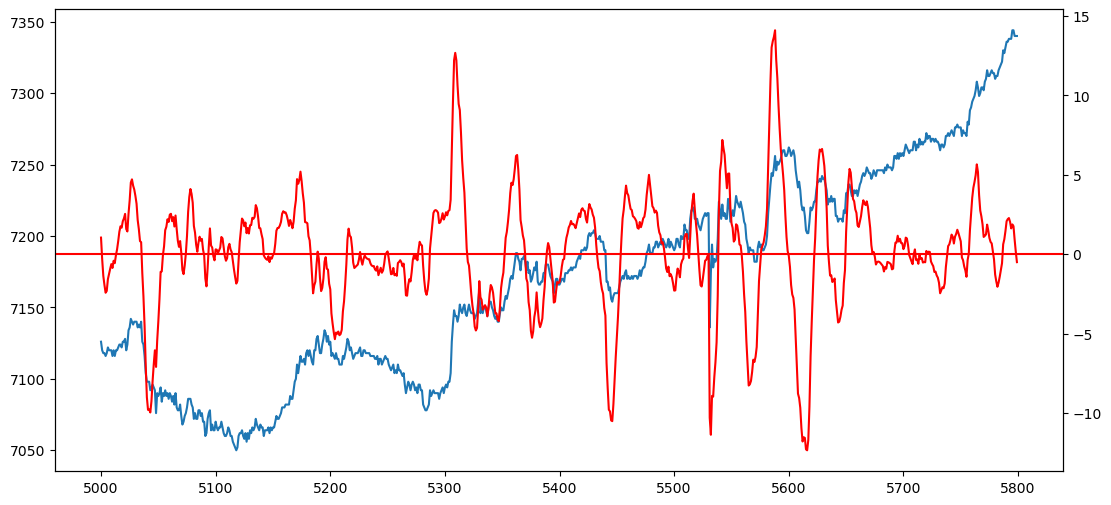

In [541]:
fig,ax1=plt.subplots(figsize=(13,6))
starti=1000
endi=1800
df.Close[starti:endi].plot()
ax2=ax1.twinx()
# retInd[starti:endi].plot(color='r')
hist[starti:endi].plot(color='r')
plt.axhline(color='r')
# subv[starti:endi].plot(color='r')
# retInd8[starti:endi].plot(color='black')

In [493]:
dfcopy=df.copy()

In [494]:
df=dfcopy.copy()# 将timestamp列转换为datetime类型并设置为索引
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 将5分钟级别K线数据合成为15分钟级别K线数据
ohlc_15min = df.resample('2T').agg({#ywl-能自动调整到以2整除的数为结束时间。
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum',
    'money': 'sum'
})

print(ohlc_15min[:10])

                       Open    High     Low   Close  Volume      money
Date                                                                  
2024-02-02 10:14:00  7058.0  7060.0  7054.0  7060.0    2486  175441200
2024-02-02 10:16:00     NaN     NaN     NaN     NaN       0          0
2024-02-02 10:18:00     NaN     NaN     NaN     NaN       0          0
2024-02-02 10:20:00     NaN     NaN     NaN     NaN       0          0
2024-02-02 10:22:00     NaN     NaN     NaN     NaN       0          0
2024-02-02 10:24:00     NaN     NaN     NaN     NaN       0          0
2024-02-02 10:26:00     NaN     NaN     NaN     NaN       0          0
2024-02-02 10:28:00     NaN     NaN     NaN     NaN       0          0
2024-02-02 10:30:00  7058.0  7066.0  7052.0  7062.0    3829  270299660
2024-02-02 10:32:00  7064.0  7064.0  7050.0  7052.0    7843  553303460


In [495]:
ohlc_15min.dropna(inplace=True)

In [496]:
df=dfcopy.copy()# 将timestamp列转换为datetime类型并设置为索引
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

macd0,signal0,hist0=calMacd(df.Close)
macd5,signal5,hist5=calMacd(ohlc_15min.Close)

hist0diff=hist0.diff()
hist5diff=hist5.diff()

In [497]:
hist5.describe()

count    1021.000000
mean       -0.029282
std         4.099102
min       -13.089477
25%        -2.527267
50%        -0.380563
75%         2.278171
max        16.047181
Name: Close, dtype: float64

In [498]:
dir=1
dir0=[]
for i in range(len(hist0diff)):#[2:]:
    dir0.append(dir)    
    if dir==1 and  hist0diff[i]<0:# and hist0diff[i-1]<0 :
        dir=0
        
    if dir==0 and  hist0diff[i]>0:# and hist0diff[i-1]>0 :
        dir=1
# dir0.append(dir) 
hist0dir=pd.DataFrame({'hist':hist0,'dir':dir0})

In [499]:
dir=0
dir0=[]
for i in range(len(hist5diff)):#[2:]:
    dir0.append(dir)    
    if dir==1 and  hist5diff[i]<0:# and hist5diff[i-1]<0:
        dir=0
        
    if dir==0 and  hist5diff[i]>0:# and hist5diff[i-1]>0:
        dir=1
# dir0.append(dir) 
hist5dir=pd.DataFrame({'hist':hist5,'dir':dir0})

In [500]:
tmp=hist5dir.dir.resample('1T').asfreq()
tmp.ffill(inplace=True)
conprehensive5=tmp[tmp.index.isin(hist0.index)]

conprehensive5=pd.Series(conprehensive5,dtype='int')

In [501]:
hist5_75_shift=(hist5>2.5).shift()
tmp=hist5_75_shift.resample('1T').asfreq()
tmp.ffill(inplace=True)
conprehensivehist5_75=tmp[tmp.index.isin(hist0.index)]
conprehensivehist5_75=pd.Series(conprehensivehist5_75,dtype='int')

In [502]:
hist5_25_shift=(hist5<-2.5).shift()
tmp=hist5_25_shift.resample('1T').asfreq()
tmp.ffill(inplace=True)
conprehensivehist5_25=tmp[tmp.index.isin(hist0.index)]
conprehensivehist5_25=pd.Series(conprehensivehist5_25,dtype='int')

In [505]:
dftest=df[:-1]
hist0dirr=hist0dir[:-1]

len(dftest),len(hist0dirr),len(conprehensive5),len(conprehensivehist5_75)

(1999, 1999, 1999, 1999)

In [506]:
dftest['0dir']=hist0dirr.dir.values
dftest['conprehensive5']=conprehensive5.values
dftest['conprehensivehist5_75']=conprehensivehist5_75.values
dftest['conprehensivehist5_25']=conprehensivehist5_25.values

C:\Users\JorelYin\AppData\Local\Temp\ipykernel_236\1638107925.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JorelYin\AppData\Local\Temp\ipykernel_236\1638107925.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JorelYin\AppData\Local\Temp\ipykernel_236\1638107925.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [507]:
dfl2=dftest.pcf[(dftest['0dir']==1) & (dftest.conprehensivehist5_75==1)]
dfl2.sum()

0.00905495732778705

In [508]:
dfl2=dftest.pcf[(dftest['0dir']==0) & dftest.conprehensivehist5_75==1]
-dfl2.sum()

-0.012138559724920173

In [509]:
dfs2=dftest.pcf[(dftest['0dir']==1) & (dftest.conprehensivehist5_25==1)]
dfs2.sum()

0.01216033280656137

In [510]:
dfs2=dftest.pcf[(dftest['0dir']==0) & (dftest.conprehensivehist5_25==1)]
-dfs2.sum()

-0.02316954651597536

# 完结

In [511]:
dfl5=dftest.pcf[(dftest['0dir']==0) &(dftest.conprehensive5==1)]
-dfl5.sum()

-0.013519168263842363

In [512]:
dfl5=dftest.pcf[(dftest['0dir']==1) &(dftest.conprehensive5==1)]
dfl5.sum()

0.008385817720849342

In [513]:
dfs5=dftest.pcf[(dftest['0dir']==1) &(dftest.conprehensive5==0)]
dfs5.sum()

-0.014512189693520194

In [514]:
dfs5=dftest.pcf[(dftest['0dir']==0) &(dftest.conprehensive5==0)]
-dfs5.sum()

-0.028425489958193717

# 开始测试另一个

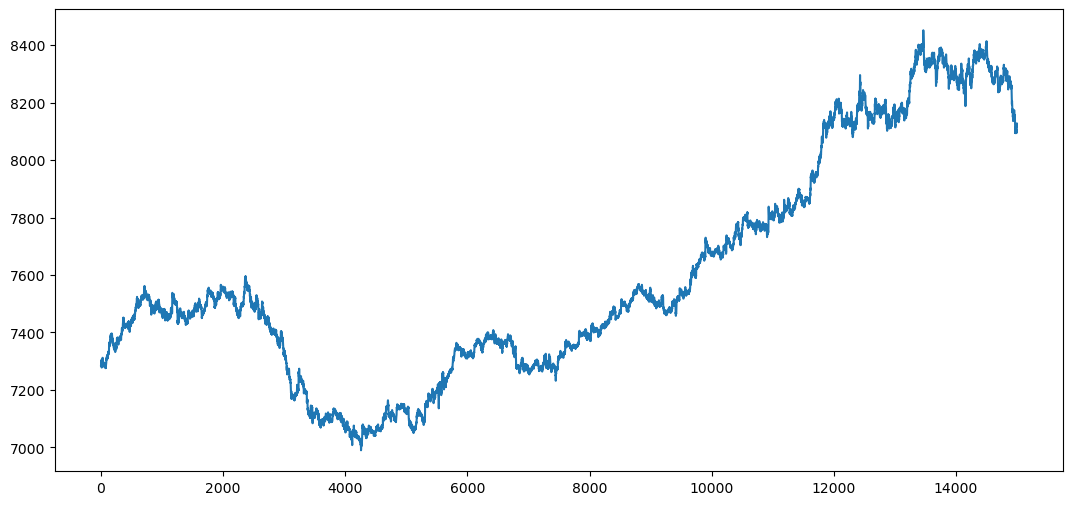

In [517]:
#i2405.XDCE_1min   P2405.XDCE_1min  P2405.XDCE_1min (1)
stock_data=pd.read_csv(r"C:\Users\JorelYin\Downloads\P2405.XDCE_1min (1).csv")
stock_data=stock_data.drop('Unnamed: 0',axis=1)
stock_data['pcg']=stock_data.close.pct_change()
df=stock_data

df['Mx_Cur30']=df.close.rolling(30,10).max()/df.close
df['Mn_Cur30']=df.close.rolling(30,10).min()/df.close
df['Mx_Cur_Dis30'] = df['close'].rolling(window=30).apply(lambda x: len(x) - x.argmax() - 1)
df['Mn_Cur_Dis30'] = df['close'].rolling(window=30).apply(lambda x: len(x) - x.argmin() - 1)

df['Mx_Cur10']=df.close.rolling(10).max()/df.close
df['Mn_Cur10']=df.close.rolling(10).min()/df.close
df['Mx_Cur_Dis10'] = df['close'].rolling(window=10).apply(lambda x: len(x) - x.argmax() - 1)
df['Mn_Cur_Dis10'] = df['close'].rolling(window=10).apply(lambda x: len(x) - x.argmin() - 1)

dfmean=df.volume.rolling(10).mean().shift(1)
tmp=df.volume/dfmean


plt.figure(figsize=(13,6))
df.close.plot()
plt.savefig("loss13.PNG", dpi=300)#, bbox_inches="tight")

<AxesSubplot:>

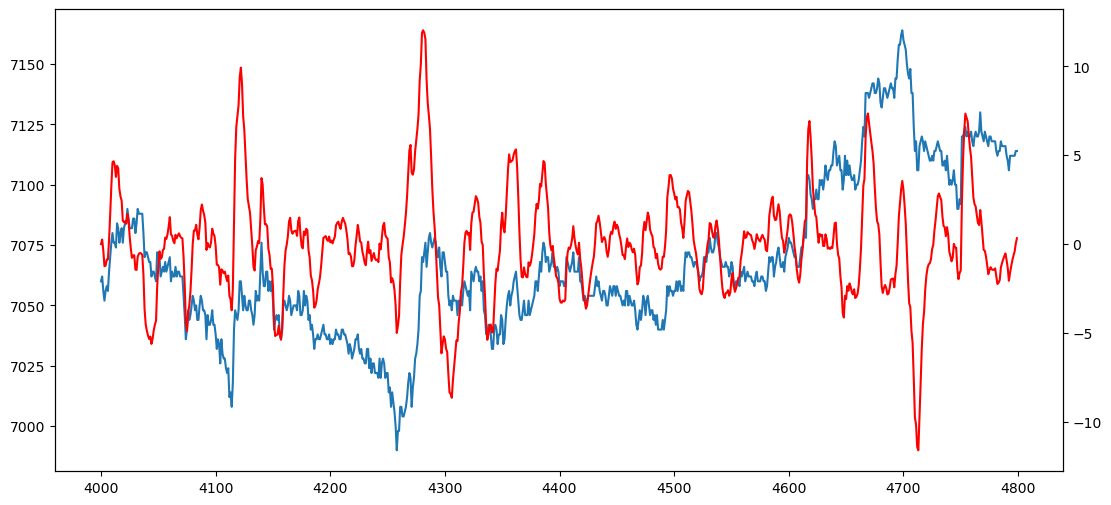

In [523]:
fig,ax1=plt.subplots(figsize=(13,6))
endi=800
df.Close[:endi].plot()
ax2=ax1.twinx()
# retInd[:endi].plot(color='r')
hist[:endi].plot(color='r')
# subv[:endi].plot(color='r')
# retInd8[:endi].plot(color='black')

Text(0, 0.5, 'Price')

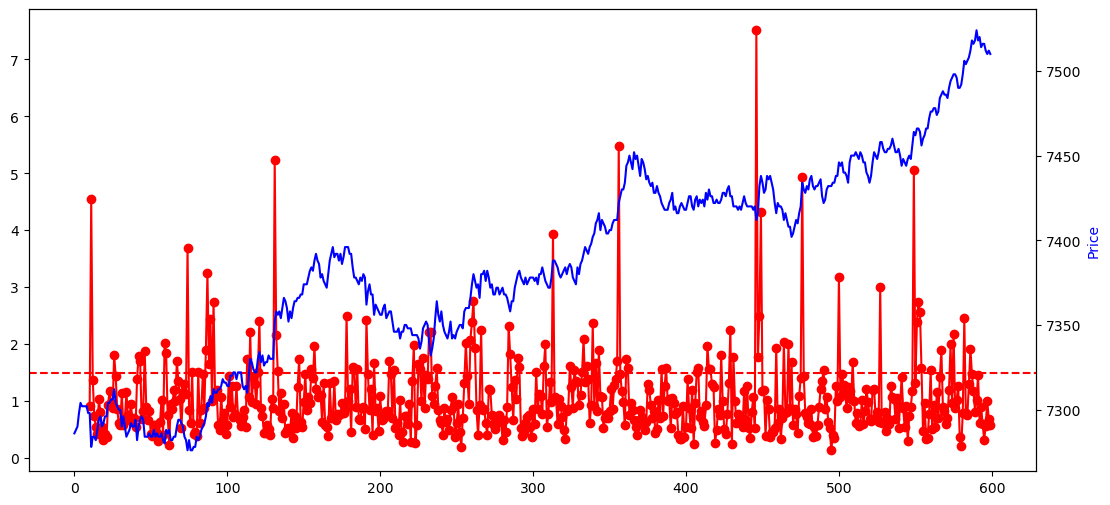

In [4]:
# 创建第一个图
fig, ax1 = plt.subplots(figsize=(13,6))
s,e=0,600
# s=0;e=s+150
ax1.plot(tmp[s:e], 'r-')
plt.plot(tmp[s:e], 'o', color='red')

for line_x in tmp[s:e][(df['Mn_Cur_Dis10']>2)&(df['pcg']>0.01)  & (tmp>1.5)].index:
    plt.axvline(x=line_x, color='black', linestyle='--')
    
plt.axhline(y=1.5, color='r', linestyle='--')

# 创建第二个纵轴，共享横轴
ax2 = ax1.twinx()
ax2.plot(df[s:e].close, 'b-')
ax2.set_ylabel('Price', color='b')

# plt.axhline(y=1, color='b', linestyle='--')

In [543]:
def get_high_low0(series:pd.Series,inteval):
    cur=0
    direction=True
    max,min=series.iloc[0],series.iloc[0]
    argmaxs=[]
    argmins=[]
    # while cur<len(df):
    #     tmp=df.Close.iloc[cur:cur+20]
    curargmax,curargmin=0,0
    tmp=series#.rolling(5).mean()
    
    peaksIndex=[]
    for i in range(len(tmp)):
        if tmp.iloc[i]>max:
            max=tmp.iloc[i]
            curargmax=i
        if tmp.iloc[i]<min:
            min=tmp.iloc[i]
            curargmin=i
        if max-min<inteval:
            continue

        if direction and tmp.iloc[i]-max<(min-max)*.2:
            argmaxs.append(curargmax)
            peaksIndex.append(curargmax)
            direction=not direction
            min=tmp.iloc[i]
            curargmin=i            
        if not direction and tmp.iloc[i]-min>(max-min)*.2:
            argmins.append(curargmin)
            peaksIndex.append(curargmin)
            direction=not direction
            max=tmp.iloc[i]
            curargmax=i 

    import matplotlib.pyplot as plt
    plt.figure(figsize=(13,6))
    tmp[:].plot()
    miny=np.min(series)
    for i,line_x in enumerate(argmaxs):
        x=line_x+series.index[0]
        plt.axvline(x=x, color='r', linestyle='--')
        plt.annotate(str(i+i),xy=(x,miny), xytext=(x-5,miny))# 

    for line_x in argmins:
        plt.axvline(x=line_x+series.index[0], color='b', linestyle='--')
        
    return peaksIndex

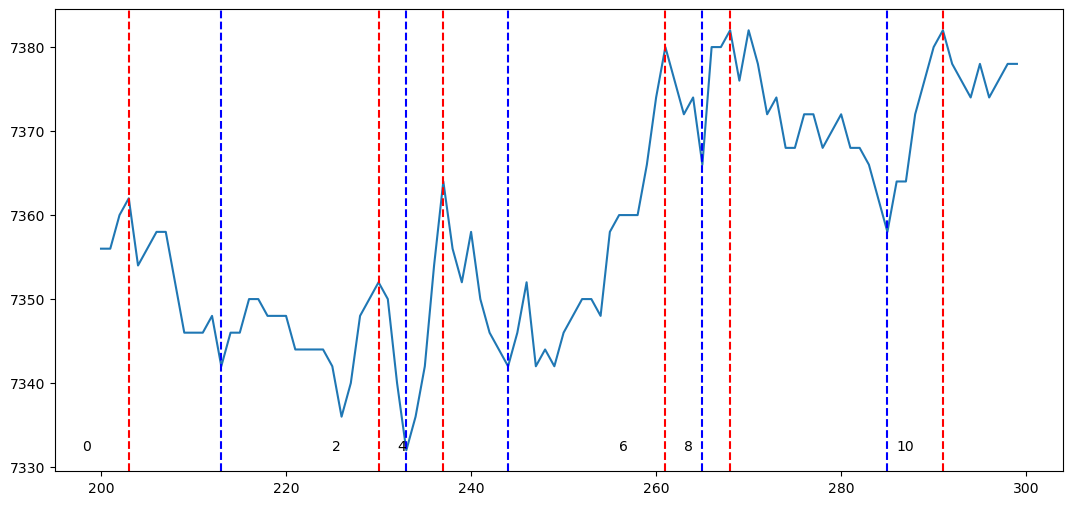

In [56]:
dftest=df[ret500[len(ret500)-3+len(ret500)%2][0]:1000].copy()
dftest=df[200:300].copy()
testclose=dftest.close
ret=get_high_low(testclose)


In [53]:
ret500 = np.array(ret) + np.array([testclose.index[0],testclose.index[0]])
ret500

array([[  4,   9],
       [ 11,  12],
       [ 17,  18],
       [ 18,  24],
       [ 26,  27],
       [ 31,  32],
       [ 32,  59],
       [ 59,  60],
       [ 68,  74],
       [ 74,  75],
       [104, 111],
       [113, 115],
       [115, 117],
       [118, 131],
       [137, 140],
       [140, 148],
       [158, 161],
       [165, 166],
       [169, 170],
       [186, 189],
       [189, 191],
       [191, 192],
       [193, 196],
       [196, 197]])

In [17]:
def locbetterall(series):
    peakadj=[]
    for i in range(len(series)-1):
        if series.index[i]%2==0:
            peakadj.append(np.max(testclose[  series[series.index[i]]  :  series[series.index[i+1]]    ]))
        else:
            peakadj.append(np.min(testclose[series[series.index[i]]:series[series.index[i+1]]]))
            
    peakadj.append(testclose[series[series.index[-1]]])
    return peakadj  

In [290]:
tmp=df.close[250:450]
tmp[250]#对于series可以有series[i]（i须为索引值）,df不能这么用。两者都可以使用切片，等价与加了.iloc.(不管加没加.iloc.另外都是前闭后开区间)

7346

C:\Users\JorelYin\AppData\Local\Temp\ipykernel_17568\1899628953.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  datas.hist(bins=100,ax = ax2)


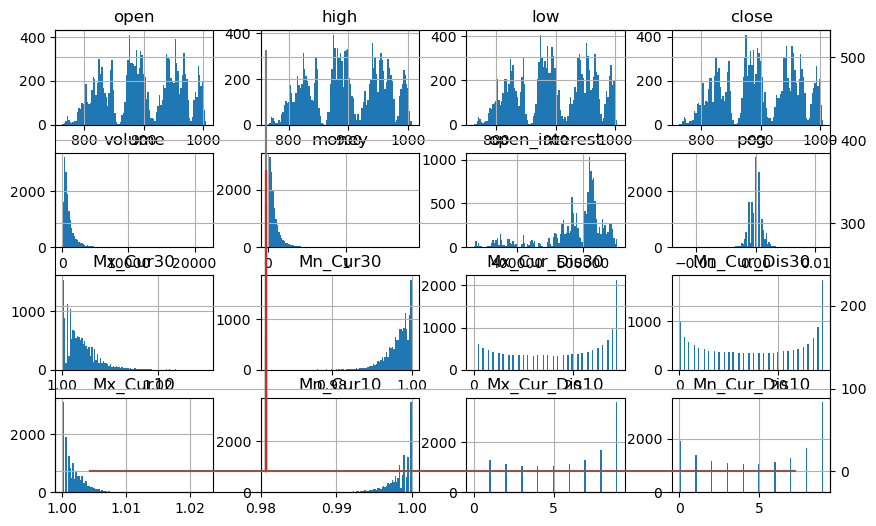

In [153]:
fig = plt.figure(figsize = (10,6))
datas=df
ax2 = fig.add_subplot(1,1,1)
datas.hist(bins=100,ax = ax2)
datas.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

plt.show()

In [154]:
print('scipy.stats.normaltest统计检验结果：----------------------------------------------------')
print(stats.normaltest(df['Temperature']))
print('scipy.stats.shapiro统计检验结果：----------------------------------------------------')
print(stats.shapiro(df['Temperature']))

scipy.stats.normaltest统计检验结果：----------------------------------------------------


NameError: name 'stats' is not defined

In [ ]:
import numpy as np
import scipy.stats as st
# data of goals scored by 20 footballers in a calendar year
fb_data =rets #[10, 11, 10, 14, 16, 24, 10, 6, 8, 10, 11, 27, 28, 21, 13, 10, 6, 7, 8, 10]
# 置信水平create 90% confidence interval
confidence_level = 0.95
# t.interval() 计算置信区间 （n<30）
print("置信区间为:",st.t.interval(confidence_level, df=len(fb_data)-1, loc=np.mean(fb_data),  scale=st.sem(fb_data)),
     np.mean(fb_data))
 
# 标准误用来衡量抽样误差，是统计推断可靠性的指标。
# scipy.stats.sem(a, axis=0, ddof=1, nan_policy='propagate')
# axis:默认为 0。如果没有，则计算整个数组a
# ddof:Delta 自由度。

In [ ]:
from scipy.stats import norm
 
data = rets# [1.2, 1.5, 1.6, 1.8, 2.0, 2.3, 2.6, 2.8, 2.9, 3.1] # 模拟数据
mean, std_dev = norm.fit(data) # 拟合数据
confidence_level = 0.95 # 置信水平为95%
# norm.interval() 函数，可用于通过使用正态分布方法计算置信区间。
# 用于数据集比较大的情况 (n>30)
lower, upper = norm.interval(confidence_level, loc=mean, scale=std_dev) 
print("置信区间为:", (lower, upper),mean)